# Matplolib - 다양한 Plot

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 > 런타임 다시 시작

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

## Line Plot

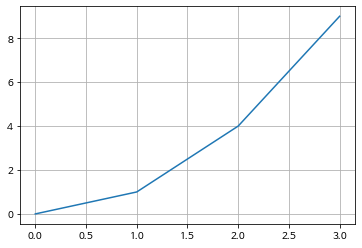

In [2]:
x = [0, 1, 2, 3]
y = [0, 1, 4, 9]
plt.plot(x, y)
plt.grid()
plt.show()

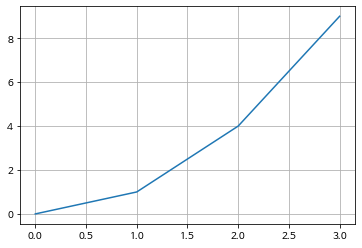

In [3]:
plt.plot([0,1,4,9])
plt.grid()
plt.show()

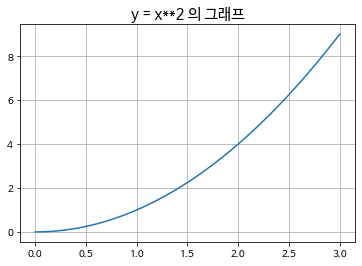

In [4]:
xs = np.arange(0,3.01,0.01)
ys = xs * xs
plt.plot(xs, ys)
plt.title('y = x**2 의 그래프', fontsize=15)
plt.grid()
plt.show()

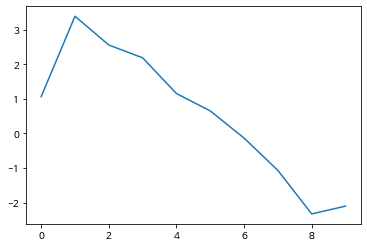

In [5]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(10))
plt.plot(s)
plt.show()

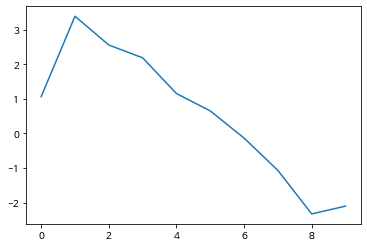

In [6]:
s.plot()
plt.show()

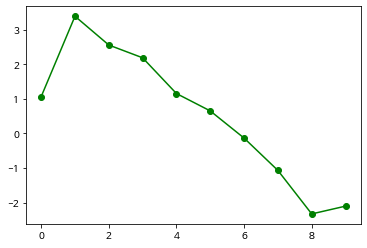

In [9]:
plt.plot(s, color='g', marker='o', linestyle='-');

### plot 약자
- color: blue, green, red, cyan, magenta, yellow, black(k), white
- marker: circle(o), 삼각형(^), 역삼각형(v), 사각형(s), 별(*), 플러스(+)
- linestyle: 직선(-), dashed(--), dash-dot(-.), dotted(:)

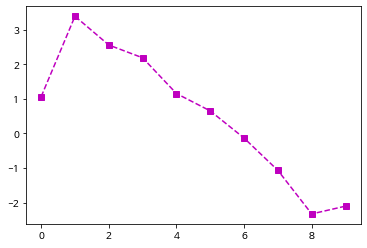

In [11]:
plt.plot(s, 'ms--');

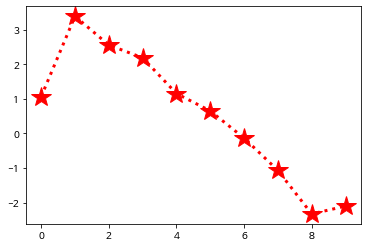

In [13]:
plt.plot(s, 'r*:', lw=3, ms=20)     # linewidth, markersize

## 산점도

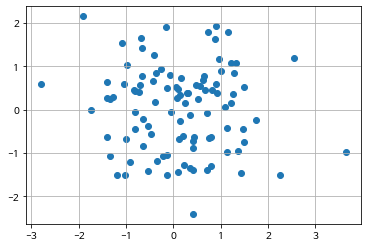

In [15]:
np.random.seed(2021)
x = np.random.randn(100)
y = np.random.randn(100)
plt.scatter(x, y)
plt.grid()
plt.show()

In [16]:
import seaborn as sns
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [17]:
anscombe.tail(3)

,dataset,x,y
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [18]:
anscombe.groupby('dataset').describe()

x                           ...     y                          
        count mean       std  min  25%  ...   min    25%   50%   75%    max
dataset                                 ...                                
I        11.0  9.0  3.316625  4.0  6.5  ...  4.26  6.315  7.58  8.57  10.84
II       11.0  9.0  3.316625  4.0  6.5  ...  3.10  6.695  8.14  8.95   9.26
III      11.0  9.0  3.316625  4.0  6.5  ...  5.39  6.250  7.11  7.98  12.74
IV       11.0  9.0  3.316625  8.0  8.0  ...  5.25  6.170  7.04  8.19  12.50

[4 rows x 16 columns]

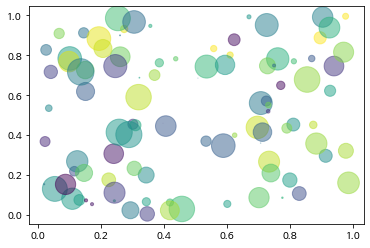

In [20]:
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.rand(100)
area = np.pi * (15 * np.random.rand(100))**2
plt.scatter(x, y, label='Samples', s=area, c=colors, alpha=0.5);

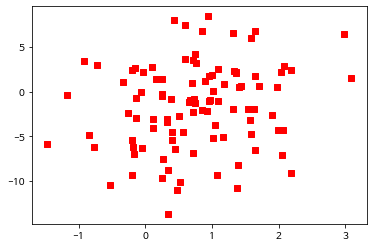

In [21]:
x1 = np.random.normal(1, 1, size=(100, 1))
x2 = np.random.normal(-2, 4, size=(100, 1))
plt.scatter(x1, x2, color='r', marker='s');

### 막대 그래프

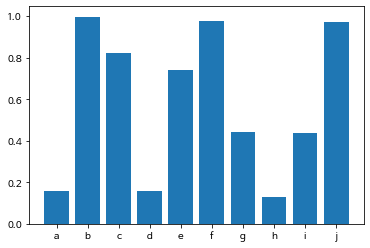

In [22]:
s2 = pd.Series(np.random.rand(10), index=list('abcdefghij'))
plt.bar(s2.index, s2.values)
plt.show()

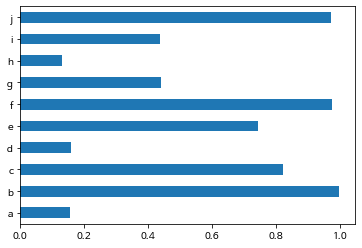

In [24]:
s2.plot(kind='barh')

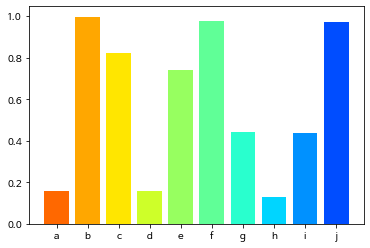

In [28]:
colors = plt.get_cmap('jet')(np.linspace(0.8,0.2,10))
plt.bar(s2.index, s2.values, color=colors)
plt.show()

### Histogram

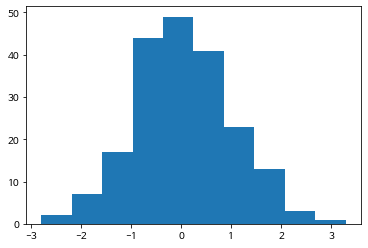

In [29]:
s3 = pd.Series(np.random.randn(200))
plt.hist(s3);

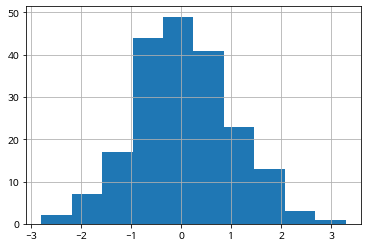

In [30]:
s3.hist();

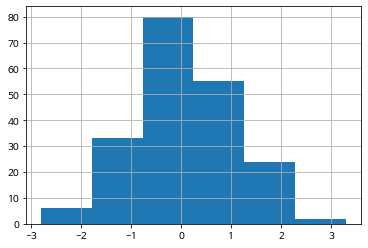

In [31]:
s3.hist(bins=6);

## Box Plot

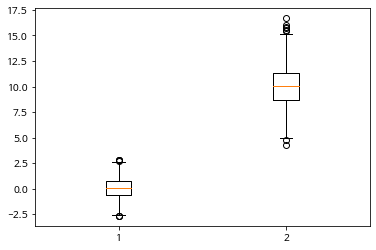

In [32]:
s4 = np.random.randn(1000)
s5 = np.random.normal(loc=10, scale=2, size=1000)
plt.boxplot([s4, s5]);

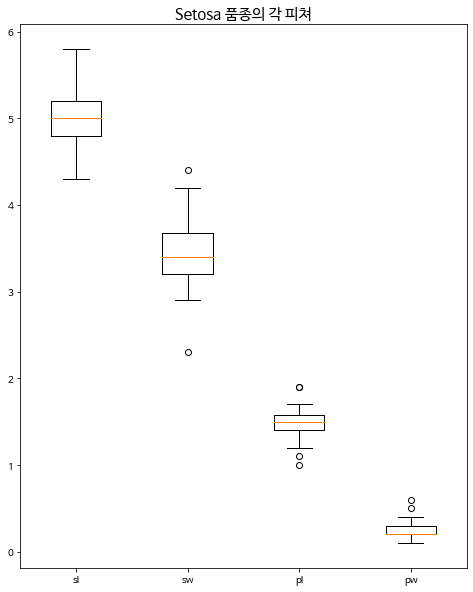

In [33]:
iris = sns.load_dataset('iris')
plt.figure(figsize=(8,10))
setosa = iris[iris.species == 'setosa']
plt.boxplot([setosa.sepal_length, setosa.sepal_width,
             setosa.petal_length, setosa.petal_width],
             labels=['sl','sw','pl','pw'])
plt.title('Setosa 품종의 각 피쳐', fontsize=15)
plt.show()

## 파이 차트

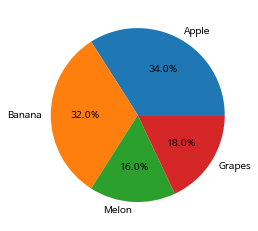

In [34]:
ratio = [34, 32, 16, 18]                        # 합이 100이어야 함
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

## 이미지 보기

In [37]:
from google.colab import files
uploaded = files.upload()

Saving cocker-spaniel.jpg to cocker-spaniel.jpg


In [42]:
filename = list(uploaded.keys())[0]

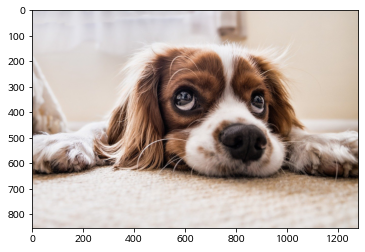

In [43]:
from PIL import Image
image = Image.open('cocker-spaniel.jpg')
plt.imshow(image)
plt.show()

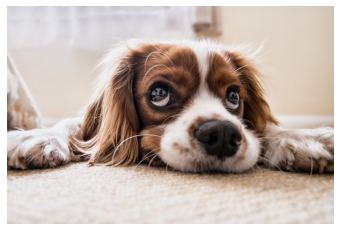

In [44]:
image = Image.open(filename)
plt.imshow(image)
plt.axis('off')
plt.show()

## 제목, 레이블, 범례

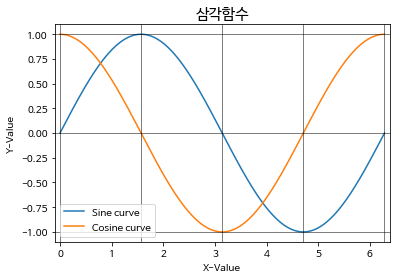

In [46]:
xs = np.linspace(0, 2*np.pi, 800)   # 0 ~ 2*pi 구간을 800 등분
ysin = np.sin(xs)
ycos = np.cos(xs)

plt.plot(xs, ysin, label='Sine curve')
plt.plot(xs, ycos, label='Cosine curve')
plt.xlim([-0.1, 2*np.pi+0.1])
plt.ylim([-1.1, 1.1])
plt.xlabel('X-Value'); plt.ylabel('Y-Value')
plt.title('삼각함수', fontsize=15)
plt.legend()                        # label을 범례로 표시

for y_val in [-1, 0, 1]:
    plt.axhline(y=y_val, color='k', linewidth=0.5)      # 수평선
for x_val in np.arange(0, 2*np.pi+0.01, np.pi/2):
    plt.axvline(x=x_val, c='k', lw=0.5)                 # 수직선

plt.show()

- 그림을 파일로 저장

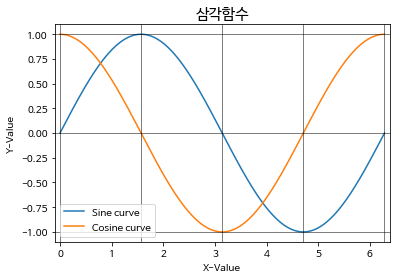

In [47]:
plt.plot(xs, ysin, label='Sine curve')
plt.plot(xs, ycos, label='Cosine curve')
plt.xlim([-0.1, 2*np.pi+0.1])
plt.ylim([-1.1, 1.1])
plt.xlabel('X-Value'); plt.ylabel('Y-Value')
plt.title('삼각함수', fontsize=15)
plt.legend()                        # label을 범례로 표시

for y_val in [-1, 0, 1]:
    plt.axhline(y=y_val, color='k', linewidth=0.5)      # 수평선
for x_val in np.arange(0, 2*np.pi+0.01, np.pi/2):
    plt.axvline(x=x_val, c='k', lw=0.5)                 # 수직선

plt.savefig('image.png')